In [1]:
!pip install mmcv-full
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

     |████████████████████████████████| 313 kB 12.7 MB/s 
     |████████████████████████████████| 185 kB 44.3 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.13-cp37-cp37m-linux_x86_64.whl size=29502244 sha256=419f1405380b7f5e780cc2f73afbc42f4514c56f30a76ea19c5cfbe29aa97359
  Stored in directory: /root/.cache/pip/wheels/9d/13/23/7c772e752c5e05ef7fc7328dccefc152df8ab7bbf66b2ee59c
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 21001, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 21001 (delta 3), reused 16 (delta 2), pack-reused 20970
Receiving objects: 100% (21001/21001), 24.75 MiB | 18.83 MiB/s, done.
Resolving deltas: 100% (14680/14680), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
wri

## PASCAL VOC형태의 BCCD Dataset를 Download 후 MS-COCO 형태로 변경
- 백혈구(WBC), 적혈구(RBC), 혈소판(Platelets)
- 다운로드 받은 Dataset은 Pascal VOC 형태이므로 이를 별도의 유틸리티를 이용하여 MS-COCO 형태로 변환 

In [18]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 8.31 MiB/s, done.
Resolving deltas: 100% (378/378), done.


## VOC를 COCO로 변환하는 package적용하기

In [3]:
!git clone https://github.com/yukkyo/voc2coco.git

fatal: destination path 'voc2coco' already exists and is not an empty directory.


In [4]:
import os

# colab 버전은 아래 명령어로 ballnfish_classes.txt 를 수정 
with open('/content/BCCD_Dataset/BCCD/labels.txt', "w") as f:
    f.write("WBC\n")
    f.write("RBC\n")
    f.write("Platelets\n")

!cat /content/BCCD_Dataset/BCCD/labels.txt

WBC
RBC
Platelets


In [5]:
# VOC를 COCO로 변환 수행. 학습/검증/테스트 용 json annotation을 생성. 
%cd voc2coco
!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/train.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/val.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/val.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/test.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/test.json \
--ext xml

/content/voc2coco
Start converting !
100% 205/205 [00:00<00:00, 3498.38it/s]
Start converting !
100% 87/87 [00:00<00:00, 3346.30it/s]
Start converting !
100% 72/72 [00:00<00:00, 3480.75it/s]


In [6]:
!cat /content/BCCD_Dataset/BCCD/train.json

{"images": [{"file_name": "BloodImage_00001.jpg", "height": 480, "width": 640, "id": "BloodImage_00001"}, {"file_name": "BloodImage_00003.jpg", "height": 480, "width": 640, "id": "BloodImage_00003"}, {"file_name": "BloodImage_00004.jpg", "height": 480, "width": 640, "id": "BloodImage_00004"}, {"file_name": "BloodImage_00005.jpg", "height": 480, "width": 640, "id": "BloodImage_00005"}, {"file_name": "BloodImage_00006.jpg", "height": 480, "width": 640, "id": "BloodImage_00006"}, {"file_name": "BloodImage_00008.jpg", "height": 480, "width": 640, "id": "BloodImage_00008"}, {"file_name": "BloodImage_00009.jpg", "height": 480, "width": 640, "id": "BloodImage_00009"}, {"file_name": "BloodImage_00010.jpg", "height": 480, "width": 640, "id": "BloodImage_00010"}, {"file_name": "BloodImage_00012.jpg", "height": 480, "width": 640, "id": "BloodImage_00012"}, {"file_name": "BloodImage_00013.jpg", "height": 480, "width": 640, "id": "BloodImage_00013"}, {"file_name": "BloodImage_00020.jpg", "height": 

In [7]:
# annotation json 파일을 잘 볼수 있는 jq 유틸리티 셋업. 
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 0s (3,190 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fr

In [8]:
!jq . /content/BCCD_Dataset/BCCD/train.json > output.json
!tail -100 output.json

      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2800
    },
    {
      "area": 9405,
      "iscrowd": 0,
      "bbox": [
        102,
        0,
        99,
        95
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2801
    },
    {
      "area": 7128,
      "iscrowd": 0,
      "bbox": [
        197,
        0,
        88,
        81
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2802
    },
    {
      "area": 756,
      "iscrowd": 0,
      "bbox": [
        0,
        280,
        21,
        36
      ],
      "category_id": 3,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2803
    },
    {
      "area": 1302,
      "iscrowd": 0,
      "bbox": [
        382,
        253,
        42,
        31
      ],
   

In [9]:
!jq . /content/BCCD_Dataset/BCCD/test.json > output.json
!cat output.json

{
  "images": [
    {
      "file_name": "BloodImage_00007.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00007"
    },
    {
      "file_name": "BloodImage_00011.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00011"
    },
    {
      "file_name": "BloodImage_00015.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00015"
    },
    {
      "file_name": "BloodImage_00016.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00016"
    },
    {
      "file_name": "BloodImage_00018.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00018"
    },
    {
      "file_name": "BloodImage_00019.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00019"
    },
    {
      "file_name": "BloodImage_00021.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00021"
    },
    {
      "file_name": "BloodImage_00031.jpg",
      "height": 480,
      "width": 640

## CocoDataset 클래스를 활용하여 BCCD Dataset을 로딩
- MS-COCO Dataset의 경우 별다른 Custom Code없이 Object들의 Class만 지정해 주면 됨

In [11]:
%cd /content

/content


In [14]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
    CLASSES = ('WBC', 'RBC', 'Platelets')

    # 단일클래스 일때
    # CLASSES = ('WBC', )

In [15]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [16]:
!pwd

/content


In [17]:
!cd /content/mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-09-24 05:04:14--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  7.45MB/s    in 17s     

2021-09-24 05:04:33 (9.19 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [18]:
!ls -lia /content/mmdetection/checkpoints

total 163376
4854152 drwxr-xr-x  2 root root      4096 Sep 24 05:04 .
4849666 drwxr-xr-x 19 root root      4096 Sep 24 05:04 ..
4854153 -rw-r--r--  1 root root 167287506 Aug 28  2020 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [19]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCCD/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 3
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = '/content/drive/MyDrive/innerwave'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

In [24]:
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

## Dataset 만들고, model 학습 및 Inference

In [25]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [26]:
datasets

[
 BCCDDataset Train dataset with number of images 205, and instance counts: 
 +----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
 | category | count | category | count | category      | count | category | count | category | count |
 +----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
 |          |       |          |       |               |       |          |       |          |       |
 | 0 [WBC]  | 214   | 1 [RBC]  | 2382  | 2 [Platelets] | 209   |          |       |          |       |
 +----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+]

In [27]:
# datasets[0].__dict__ 로 모든 self variables의 key와 value값을 볼 수 있음
datasets[0].__dict__.keys()

dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [28]:
datasets[0].__dict__.values()

dict_values(['/content/BCCD_Dataset/BCCD/train.json', '/content/BCCD_Dataset/BCCD/', '/content/BCCD_Dataset/BCCD/JPEGImages', None, None, False, True, ('WBC', 'RBC', 'Platelets'), <mmdet.datasets.api_wrappers.coco_api.COCO object at 0x7fa657184310>, [1, 2, 3], {1: 0, 2: 1, 3: 2}, ['BloodImage_00001', 'BloodImage_00003', 'BloodImage_00004', 'BloodImage_00005', 'BloodImage_00006', 'BloodImage_00008', 'BloodImage_00009', 'BloodImage_00010', 'BloodImage_00012', 'BloodImage_00013', 'BloodImage_00020', 'BloodImage_00022', 'BloodImage_00023', 'BloodImage_00024', 'BloodImage_00026', 'BloodImage_00032', 'BloodImage_00034', 'BloodImage_00036', 'BloodImage_00038', 'BloodImage_00039', 'BloodImage_00040', 'BloodImage_00042', 'BloodImage_00043', 'BloodImage_00044', 'BloodImage_00045', 'BloodImage_00046', 'BloodImage_00047', 'BloodImage_00048', 'BloodImage_00049', 'BloodImage_00050', 'BloodImage_00052', 'BloodImage_00054', 'BloodImage_00056', 'BloodImage_00059', 'BloodImage_00069', 'BloodImage_00070'

In [29]:
datasets[0].data_infos

[{'file_name': 'BloodImage_00001.jpg',
  'filename': 'BloodImage_00001.jpg',
  'height': 480,
  'id': 'BloodImage_00001',
  'width': 640},
 {'file_name': 'BloodImage_00003.jpg',
  'filename': 'BloodImage_00003.jpg',
  'height': 480,
  'id': 'BloodImage_00003',
  'width': 640},
 {'file_name': 'BloodImage_00004.jpg',
  'filename': 'BloodImage_00004.jpg',
  'height': 480,
  'id': 'BloodImage_00004',
  'width': 640},
 {'file_name': 'BloodImage_00005.jpg',
  'filename': 'BloodImage_00005.jpg',
  'height': 480,
  'id': 'BloodImage_00005',
  'width': 640},
 {'file_name': 'BloodImage_00006.jpg',
  'filename': 'BloodImage_00006.jpg',
  'height': 480,
  'id': 'BloodImage_00006',
  'width': 640},
 {'file_name': 'BloodImage_00008.jpg',
  'filename': 'BloodImage_00008.jpg',
  'height': 480,
  'id': 'BloodImage_00008',
  'width': 640},
 {'file_name': 'BloodImage_00009.jpg',
  'filename': 'BloodImage_00009.jpg',
  'height': 480,
  'id': 'BloodImage_00009',
  'width': 640},
 {'file_name': 'BloodImage_

In [31]:
datasets[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, poly2mask={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [33]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('WBC', 'RBC', 'Platelets')


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


In [37]:
train_detector(model, datasets, cfg, distributed=False, validate=True)

2021-09-24 06:03:14,187 - mmdet - INFO - load checkpoint from /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-09-24 06:03:14,189 - mmdet - INFO - Use load_from_local loader
2021-09-24 06:03:14,325 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([12]).
2021-09-24 06:03:14,329 -

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
2021-09-24 06:03:32,185 - mmdet - INFO - Epoch [1][10/103]	lr: 2.500e

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 2.7 task/s, elapsed: 32s, ETA:     0s

2021-09-24 06:35:45,619 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-09-24 06:35:46,604 - mmdet - INFO - Epoch(val) [12][87]	bbox_mAP: 0.6270, bbox_mAP_50: 0.9070, bbox_mAP_75: 0.7260, bbox_mAP_s: 0.1540, bbox_mAP_m: 0.5030, bbox_mAP_l: 0.7270, bbox_mAP_copypaste: 0.627 0.907 0.726 0.154 0.503 0.727


DONE (t=0.87s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.627
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.907
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.726
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.503
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.727
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.713
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.713
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.713
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.631
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


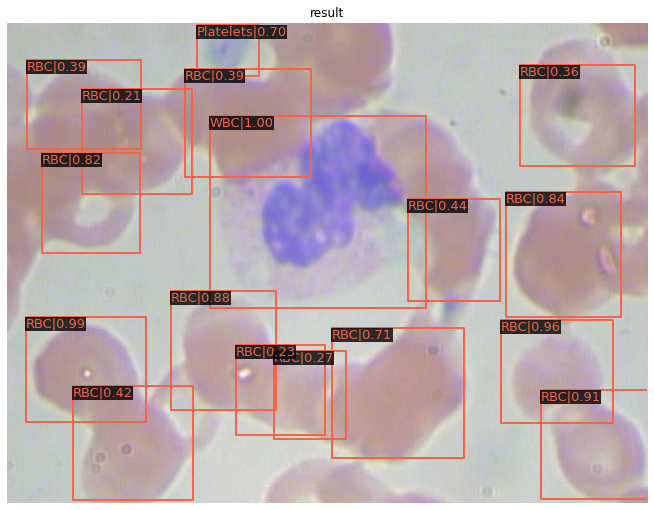

In [40]:
import cv2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/innerwave/epoch_12.pth' 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

img = cv2.imread('/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00007.jpg')

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.2)

In [41]:
model.__dict__

{'CLASSES': ('WBC', 'RBC', 'Platelets'),
 '_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_is_init': False,
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict([('backbone', ResNet(
                 (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                 (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                 (relu): ReLU(inplace=True)
                 (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                 (layer1): ResLayer(
                   (0): Bottleneck(
                     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                     (conv2): Conv2d(64, 64, kernel

## 테스트 데이터 세트에 Inference 및 Evaluation 적용하기
- 런타임 다시 시작 수행 필요(버그?)
- tools/test.py 스크립트는 colab에서 오류 발생
- 테스트용 Dataset과 DataLoader생성하고 single_gpu_test()를 호출하여 inference 결과를 반환. batch_size를 1로 설정하지 않으면 single_gpu_test() 오류 발생.

In [1]:
from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed

@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
  CLASSES = ('WBC', 'RBC', 'Platelets') 

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

cfg = Config.fromfile(config_file)


# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCCD/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 3
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = '/content/drive/MyDrive/innerwave'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# bug(?)로 인해 test용 dataset evaluation 시 1로 설정. data loader에서 GPU갯수별 Batch size 임. 
cfg.data.samples_per_gpu = 1

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

In [2]:
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [3]:
cfg.dump('/content/drive/MyDrive/innerwave/bccd_faster_rcnn_conf.py')

In [ ]:
cfg.

In [4]:
!mkdir -p /content/drive/MyDrive/innerwave/show_test_output

In [5]:
# tools/test.py 는 colab에서 제대로 동작하지 않음.
%cd /content/mmdetection
!python tools/test.py /content/drive/MyDrive/innerwave/bccd_faster_rcnn_conf.py /content/drive/MyDrive/innerwave/epoch_12.pth \
--eval 'bbox' \
--show-dir /content/drive/MyDrive/innerwave/show_test_output

/content/mmdetection
Traceback (most recent call last):
  File "tools/test.py", line 238, in <module>
    main()
  File "tools/test.py", line 177, in main
    dataset = build_dataset(cfg.data.test)
  File "/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/datasets/builder.py", line 78, in build_dataset
    dataset = build_from_cfg(cfg, DATASETS, default_args)
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 45, in build_from_cfg
    f'{obj_type} is not in the {registry.name} registry')
KeyError: 'BCCDDataset is not in the dataset registry'


## 테스트용 dataset와 dataloader를 별도로 설정하고 trained된 checkpoint 모델을 로딩하여 test 수행.

In [6]:
from mmdet.datasets import build_dataloader, build_dataset, replace_ImageToTensor

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        samples_per_gpu=cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

# 반드시 아래 코드에서 'img' 키값이 tensor로 출력되어야 함. 
next(iter(data_loader))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


{'img': [tensor([[[[0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9646, 0.9646, 0.9646,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2206, 1.2206, 1.2206,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],
            [1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],

In [7]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/innerwave/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [8]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel


model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/drive/MyDrive/innerwave/show_test_output ', 0.3)

[                                                  ] 0/72, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 72/72, 1.8 task/s, elapsed: 39s, ETA:     0s

## 반환된 test용 데이터세트의 inference 적용 결과 확인 및 성능 evaluation 수행

In [15]:
print('결과 outputs type:', type(outputs))
print('evalution 된 파일의 갯수:', len(outputs))
print('첫번째 evalutation 결과의 type:', type(outputs[0]))
print('첫번째 evaluation 결과의 CLASS 갯수:', len(outputs[0]))
print('첫번째 evaluation 결과의 CLASS ID 0의 type과 shape', type(outputs[0][0]), outputs[0][0].shape)

결과 outputs type: <class 'list'>
evalution 된 파일의 갯수: 72
첫번째 evalutation 결과의 type: <class 'list'>
첫번째 evaluation 결과의 CLASS 갯수: 3
첫번째 evaluation 결과의 CLASS ID 0의 type과 shape <class 'numpy.ndarray'> (1, 5)


In [12]:
outputs

[[array([[202.16196   ,  93.09773   , 418.65387   , 285.3896    ,
            0.99746335]], dtype=float32),
  array([[1.8098999e+01, 2.9447797e+02, 1.3889359e+02, 3.9993555e+02,
          9.8530096e-01],
         [4.9303741e+02, 2.9754620e+02, 6.0574811e+02, 4.0081073e+02,
          9.5990163e-01],
         [5.3329810e+02, 3.6701279e+02, 6.4000000e+02, 4.7624936e+02,
          9.1025758e-01],
         [1.6340596e+02, 2.6846500e+02, 2.6825140e+02, 3.8755627e+02,
          8.8177121e-01],
         [4.9864764e+02, 1.6934766e+02, 6.1381091e+02, 2.9432248e+02,
          8.3717138e-01],
         [3.4707783e+01, 1.3076949e+02, 1.3285701e+02, 2.3062349e+02,
          8.2402706e-01],
         [3.2409689e+02, 3.0532623e+02, 4.5682364e+02, 4.3585010e+02,
          7.0808548e-01],
         [4.0089648e+02, 1.7697272e+02, 4.9279013e+02, 2.7804181e+02,
          4.3668276e-01],
         [6.5092712e+01, 3.6331693e+02, 1.8581146e+02, 4.7780896e+02,
          4.1542056e-01],
         [1.9560776e+01, 3.7

In [17]:
metric = dataset.evaluate(outputs, metric='bbox')
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.76s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.634
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.924
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.740
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.614
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.512
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.475
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 